# 1. Introduction

## 1.1 Background

Source distribution plays a key role in world economic. Investing in a corporate means providing funds to target corporate for their growth at a reasonable price in order to obtain income and capital appreciation from its growth of performance. The investment process mainly consists of conducting investment analysis, making investment decisions, taking investment actions and monitoring and review. Selecting a good quality corporate from the beginning of the investment process may significant reduct the investment costs, e.g. opportunity cost, hedging cost, exit costs.

## 1.2 Problem

How to select a good quality corporate is a problem being asked for decades. There are thoudsand corporate in the public traded markets. It is hard for fund managers to analyze each corporate, even using simplid methods.

Top-down strategies help us to select corporates from industries to specific corporate, but the view on a specific industry will lead to confirmation bias. Before picking a good quality corporate for deep analysis, a flexible framework for screening and segmenting corporate will help fund managers to save much time for the following analysis. The direction of this project is to provide a objective advise for fund managers while a potential target comes into his mind. But there is not any standard for assessing the level of objective. Analyzing a corporate is as looking a obejct in the sun light. We have to observe it from different directions to fully understand the object.

This project aims to 1) cluster corporates by mean-variance characteristics and financial ratios in order to combine Markovitz's efficient market theory (even this theory is not realistic, but his view on selecting corporate by statistic method promotes systematic investment analysis in the real world) and fundamental analysis at the beginning stage of screening corporate, 2) pick up representative constituent from each cluster for mimic the Index with financial preference.

# 2. Data acquisition

## 2.1 Data collection

For this project we only use the constituents in CSI 300 Index.
We can obtain all data that we need by **JoinQuant API**. The amount of queries is limited to one million per day. We can use following code to download the data that we need.

In [292]:
from jqdatasdk import *
import datetime

In [293]:
#account = 'Account name' # <- Input the account name here
#password = 'Password'  # <- Input the password here
#auth(account, password)

auth success


We need two dataset for this report: 1) Market closing price of CSI 300 Index constituents, 2) their financial ratios

### 2.1.1 Collection of Market closing price

The start date is 1st of Jan 2010, and the end date is 1st of Feb 2020.

Following code is used for collecting data by using JoinQuant API.

In [294]:
'''
index = '000300.XSHG' # Here is the CSI 300 Index's ticker
security_list = get_index_stocks(index) # Using the API function to obtain all the tickers of constitutent in CSI 300 Index

#Get daily closing price data from 2010 to 2020
start_date = datetime.date(2010, 1, 1)
end_date = datetime.date(2020, 2, 1)
frequency = 'daily'
fields = ['close']
df_market_price = get_price(security_list, start_date=start_date, end_date=end_date, frequency=frequency, fields=fields)
df_market_price = df_market_price['close'] # Here is the dataframe with all the constituents and their closing price in the past 10 years.
'''

For saving time, the data has been downloaded and saved into the **Daily_Trading_Data.csv**

In [2]:
import pandas as pd
# Load the Daily trading data from file
df_market_price = pd.read_csv('Daily_Trading_Data.csv')

In [3]:
df_market_price.shape

(2447, 301)

In [296]:
df_market_price.head()

,Unnamed: 0,000001.XSHE,000002.XSHE,000063.XSHE,000069.XSHE,000100.XSHE,000157.XSHE,000166.XSHE,000333.XSHE,000338.XSHE,...,603160.XSHG,603259.XSHG,603260.XSHG,603288.XSHG,603501.XSHG,603799.XSHG,603833.XSHG,603899.XSHG,603986.XSHG,603993.XSHG
0,2010-01-04,7.81,7.92,19.68,5.99,2.18,5.85,NaN,NaN,5.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,7.67,7.74,20.05,5.73,2.25,5.75,NaN,NaN,5.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,7.54,7.74,19.64,5.79,2.19,5.98,NaN,NaN,5.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,7.46,7.68,18.73,5.70,2.18,5.81,NaN,NaN,5.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,7.44,7.73,18.81,5.76,2.22,5.71,NaN,NaN,5.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1.2 Collection of Financial ratios

According to the JoinQuant API Manual, we use the API function **query** to obtain the financial ratios by 2018 year of all the CSI 300 Index Constituents

In [297]:
q = query(
        valuation.code,
        indicator.roe,
        indicator.roa,
        indicator.operating_profit_to_profit,
        indicator.net_profit_to_total_revenue,
        indicator.ocf_to_revenue
    ).filter(
        valuation.code.in_(security_list)
    )
df_finance = get_fundamentals(q, statDate='2018')

For saving time, the financial ratio data has been downloaded and saved into the **Financial_Ratio_Data.csv**

In [7]:
df_finance = pd.read_csv("Financial_Ratio_Data.csv")

In [8]:
df_finance.shape

(292, 7)

In [299]:
df_finance.head()

,Unnamed: 0,code,roe,roa,operating_profit_to_profit,net_profit_to_total_revenue,ocf_to_revenue
0,0,000001.XSHE,10.7415,0.7445,67.6398,21.2636,-49.1132
1,1,000002.XSHE,23.4175,3.6580,89.8714,16.5521,11.2934
2,2,000063.XSHE,-25.6072,-5.0853,NaN,-8.1266,-10.7766
3,3,000069.XSHE,19.0496,4.4150,81.4199,23.4603,-20.7390
4,4,000100.XSHE,11.5144,2.3029,-5.1017,3.5833,9.2507


## 2.2 Data Preprocessing

### 2.2.1 Market Trading Data

The source data may contain NaN because some constintuents' shares were not traded at specific date when declaring important event, some constituents were listed into the CSI 300 Index in the middle of period from 2010 to 2020. For this project we need to calculate the rate of return of each constitutent, and then the mean and standard deviation.

For calculation the rate of return of each constituent, we will use the function **pct_change()** with a dataframe withwout trading date.

In [300]:
df = df_market_price.drop(columns='Unnamed: 0')
df.head()

,000001.XSHE,000002.XSHE,000063.XSHE,000069.XSHE,000100.XSHE,000157.XSHE,000166.XSHE,000333.XSHE,000338.XSHE,000413.XSHE,...,603160.XSHG,603259.XSHG,603260.XSHG,603288.XSHG,603501.XSHG,603799.XSHG,603833.XSHG,603899.XSHG,603986.XSHG,603993.XSHG
0,7.81,7.92,19.68,5.99,2.18,5.85,NaN,NaN,5.32,2.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.67,7.74,20.05,5.73,2.25,5.75,NaN,NaN,5.22,2.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.54,7.74,19.64,5.79,2.19,5.98,NaN,NaN,5.69,2.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.46,7.68,18.73,5.70,2.18,5.81,NaN,NaN,5.67,2.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.44,7.73,18.81,5.76,2.22,5.71,NaN,NaN,5.76,2.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When we got the dataframe with rates of return, we can use the function **describe()** to receive the statistic data.

In [301]:
df.pct_change().describe()

,000001.XSHE,000002.XSHE,000063.XSHE,000069.XSHE,000100.XSHE,000157.XSHE,000166.XSHE,000333.XSHE,000338.XSHE,000413.XSHE,...,603160.XSHG,603259.XSHG,603260.XSHG,603288.XSHG,603501.XSHG,603799.XSHG,603833.XSHG,603899.XSHG,603986.XSHG,603993.XSHG
count,2446.000000,2446.000000,2446.000000,2446.000000,2446.000000,2446.000000,1219.000000,1547.000000,2446.000000,2446.000000,...,801.000000,421.000000,547.000000,1456.000000,667.000000,1216.000000,691.000000,1218.000000,836.000000,1777.000000
mean,0.000499,0.000798,0.000668,0.000344,0.000621,0.000283,-0.000611,0.001411,0.000669,0.000398,...,0.003707,0.004052,0.001105,0.001520,0.005113,0.002962,0.000997,0.001817,0.004491,0.000706
std,0.020919,0.023231,0.027802,0.023451,0.023595,0.022518,0.022202,0.022966,0.023968,0.027789,...,0.033976,0.033739,0.030415,0.022545,0.038610,0.041801,0.025600,0.028413,0.037379,0.031713
min,-0.100798,-0.100106,-0.100493,-0.101604,-0.101852,-0.101498,-0.101316,-0.100102,-0.101512,-0.100642,...,-0.100006,-0.095006,-0.100191,-0.100096,-0.100083,-0.101023,-0.092345,-0.100344,-0.100097,-0.101176
25%,-0.009836,-0.011115,-0.013282,-0.011964,-0.010603,-0.010124,-0.008266,-0.010930,-0.012245,-0.012722,...,-0.014420,-0.012304,-0.013482,-0.010254,-0.012750,-0.020511,-0.013834,-0.011759,-0.012709,-0.015707
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000298,0.000000,0.000000,...,0.000971,0.000000,0.000000,0.000923,0.000000,0.001687,-0.000958,0.000403,0.000000,0.000000
75%,0.008658,0.010350,0.014009,0.012174,0.010638,0.010200,0.007868,0.012891,0.012845,0.012481,...,0.018031,0.018220,0.016237,0.012175,0.021748,0.024555,0.013996,0.014078,0.017995,0.014644
max,0.101248,0.100894,0.100709,0.101075,0.101911,0.100437,0.101313,0.100055,0.101149,0.101818,...,0.100364,0.100190,0.100313,0.100177,0.100822,0.101010,0.100116,0.100625,0.100422,0.103627


At this moment, we easily get the mean and standard deviation of each constituent.

In [302]:
df_market = df.pct_change().describe().loc[['mean', 'std'], :].T
# Transposed dataframe will be used for further clustering
df_market.head()

,mean,std
000001.XSHE,0.000499,0.020919
000002.XSHE,0.000798,0.023231
000063.XSHE,0.000668,0.027802
000069.XSHE,0.000344,0.023451
000100.XSHE,0.000621,0.023595


### 2.2.2 Financial Ratio Data

Firstly, we need to check whether there are NaN in the dataframe.

In [9]:
df_finance.isnull().sum()

Unnamed: 0                     0
code                           0
roe                            0
roa                            0
operating_profit_to_profit     7
net_profit_to_total_revenue    0
ocf_to_revenue                 0
dtype: int64

As the result shown above, there are *7* NaN in **operating_profit_to_profit**. For this project we only take account for the companies whose financial ratios are in the database. But we can put the companies whose financial ratios are not fully saved in the database into a list for further reseaching (Hint: the financial ratios are calculated on the basis of the data in financial reporting. For example, **the operating profit to profit** can be calculated by dividing **operating profit** to **net profit**. Items, **operating profit** and **net profit**, are revealed in **Income Statement** in Financial Reporting.

At this moment, wee need to extract the stock tickers of companies whose financial ratios are not fully saved in the database.

In [10]:
df_finance = df_finance.dropna()
df_finance.head()

,Unnamed: 0,code,roe,roa,operating_profit_to_profit,net_profit_to_total_revenue,ocf_to_revenue
0,0,000001.XSHE,10.7415,0.7445,67.6398,21.2636,-49.1132
1,1,000002.XSHE,23.4175,3.6580,89.8714,16.5521,11.2934
3,3,000069.XSHE,19.0496,4.4150,81.4199,23.4603,-20.7390
4,4,000100.XSHE,11.5144,2.3029,-5.1017,3.5833,9.2507
5,5,000157.XSHE,5.3309,2.2158,56.4621,6.8184,17.6471


In [11]:
df_finance.shape

(285, 7)

In [305]:
df_finance.drop(columns='Unnamed: 0', inplace=True)

In [306]:
df_finance.set_index('code', inplace=True)

In [307]:
df_finance.isnull().sum()

roe                            0
roa                            0
operating_profit_to_profit     0
net_profit_to_total_revenue    0
ocf_to_revenue                 0
dtype: int64

At this moment, **Market Trading Data** and **Financial Ratio Data** have been ready for clustering.

## 2.2 Feature Selection

From the view of Quantitative analysis, the daily rates of return reflect the market views on constituents. But market is not always right. The driver of trading may be influenced by emotion, psychological status, market liquidity and the other factors. So the market trading data cannot reveal a true status of underlyings, especially the financial status. The mean and standard deviation are the basic parameters reflecting the expected return and risk of an underlying.

From the view of Qualitative analysis, financial ratios play a key role for assessing the value of a company. For this project, we use 5 financial ratios.

# 3. Exploratory Data Analysis

## 3.1 Clustering constituents by Market Trading Data

In [308]:
df_market.head()

,mean,std
000001.XSHE,0.000499,0.020919
000002.XSHE,0.000798,0.023231
000063.XSHE,0.000668,0.027802
000069.XSHE,0.000344,0.023451
000100.XSHE,0.000621,0.023595


In [309]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

# The Market Trading Data will be clustered into 10 groups.
kclusters = 10
grouped_clustering = df_market
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_
df_market.insert(0, 'Cluster Labels', kmeans.labels_)

In [310]:
df_market.head()

,Cluster Labels,mean,std
000001.XSHE,3,0.000499,0.020919
000002.XSHE,9,0.000798,0.023231
000063.XSHE,0,0.000668,0.027802
000069.XSHE,9,0.000344,0.023451
000100.XSHE,9,0.000621,0.023595


## 3.2 Clustering constituents by Financial Ratio Data

In [311]:
df_finance.head()

,roe,roa,operating_profit_to_profit,net_profit_to_total_revenue,ocf_to_revenue
code,,,,,
000001.XSHE,10.7415,0.7445,67.6398,21.2636,-49.1132
000002.XSHE,23.4175,3.6580,89.8714,16.5521,11.2934
000069.XSHE,19.0496,4.4150,81.4199,23.4603,-20.7390
000100.XSHE,11.5144,2.3029,-5.1017,3.5833,9.2507
000157.XSHE,5.3309,2.2158,56.4621,6.8184,17.6471


In [312]:
grouped_clustering = df_finance
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=2).fit(grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_
df_finance.insert(0, 'Cluster Labels', kmeans.labels_)

In [313]:
df_finance.head()

,Cluster Labels,roe,roa,operating_profit_to_profit,net_profit_to_total_revenue,ocf_to_revenue
code,,,,,,
000001.XSHE,0,10.7415,0.7445,67.6398,21.2636,-49.1132
000002.XSHE,6,23.4175,3.6580,89.8714,16.5521,11.2934
000069.XSHE,6,19.0496,4.4150,81.4199,23.4603,-20.7390
000100.XSHE,0,11.5144,2.3029,-5.1017,3.5833,9.2507
000157.XSHE,0,5.3309,2.2158,56.4621,6.8184,17.6471


Before combining **Market Trading Data** and **Financial Ratio Data** we need to change the column "Cluster Labels" in each dataframe. For Market Trading Data, the column name is changed to "MTD_CL". For Financial Ratio Data, the column name will be changed to 'FRD_CL".

In [314]:
# Change the column name for Market Trading Data
df_market.rename(columns={'Cluster Labels':'MTD_CL'}, inplace=True)

In [315]:
# Change the column name for Financial Ratio Data
df_finance.rename(columns={'Cluster Labels':'FRD_CL'}, inplace=True)

## 3.3 Visualization

### 3.4.1 Market Trading Data

In [316]:
df_market.head()

,MTD_CL,mean,std
000001.XSHE,3,0.000499,0.020919
000002.XSHE,9,0.000798,0.023231
000063.XSHE,0,0.000668,0.027802
000069.XSHE,9,0.000344,0.023451
000100.XSHE,9,0.000621,0.023595


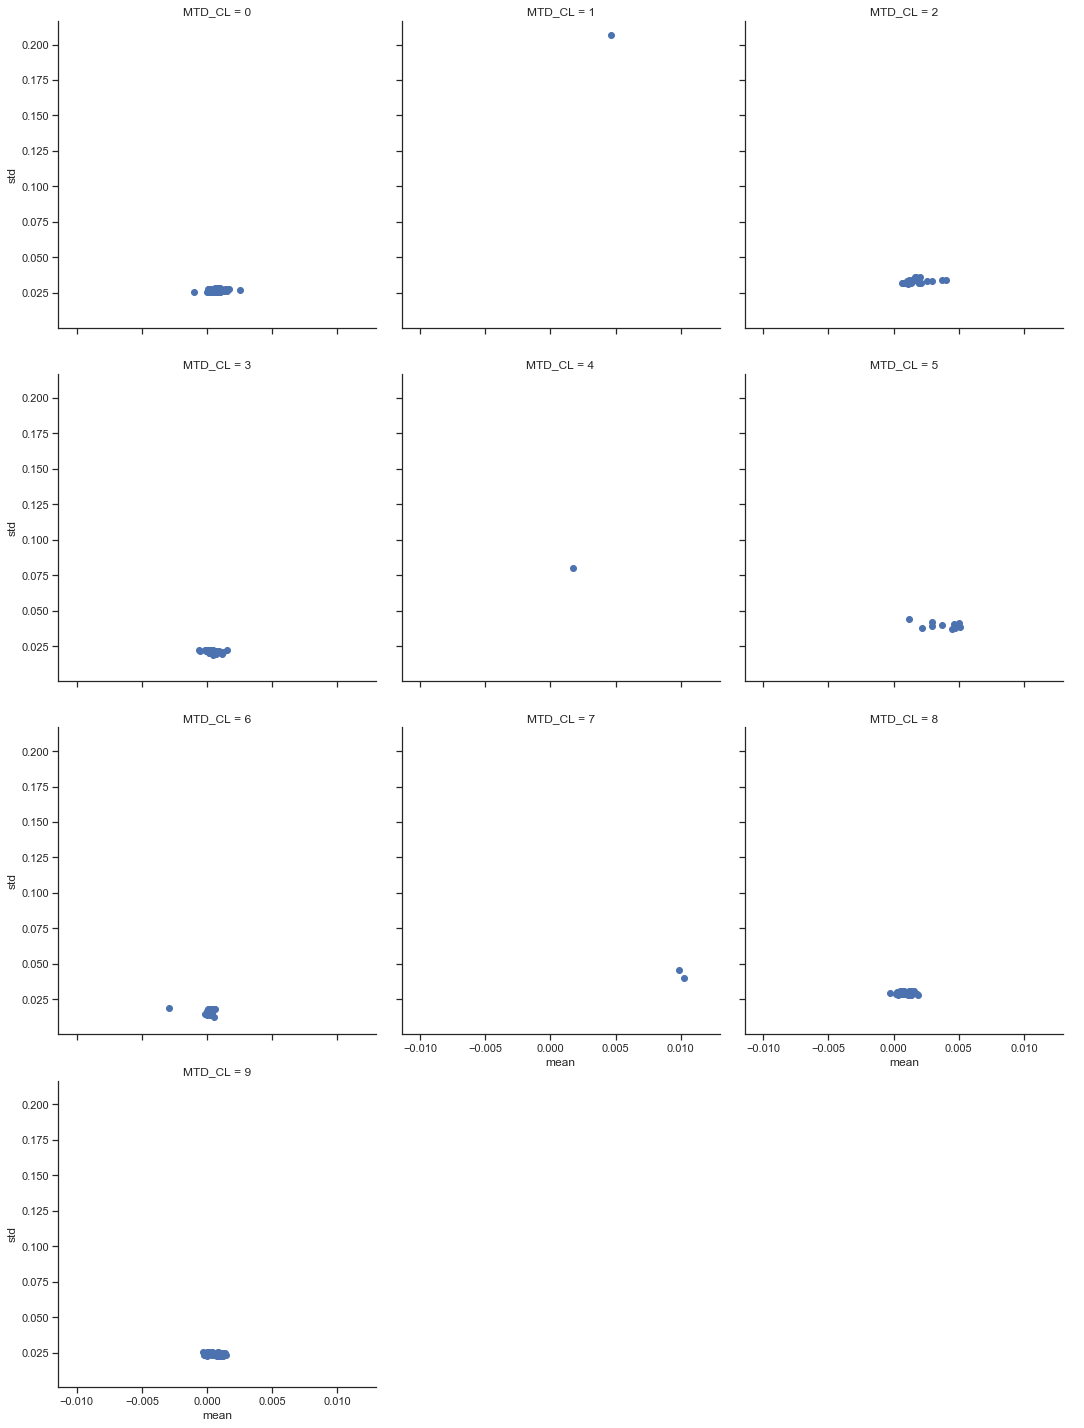

In [317]:
import seaborn as sns
import matplotlib.pyplot as plt
#ax = sns.scatterplot(x='mean', y='std', palette=cmap, legend='full', data=df_market[df_market['MTD_CL']==0])
#ax = sns.scatterplot(x='mean', y='std', palette=cmap, legend='full', data=df_market[df_market['MTD_CL']==1])

g = sns.FacetGrid(df_market, col='MTD_CL', col_wrap=3, height=5)
g.map(plt.scatter, "mean", "std")
g.add_legend()

The graphic shown above reveals the distribution of constituents.

In [318]:
df_market.head()

,MTD_CL,mean,std
000001.XSHE,3,0.000499,0.020919
000002.XSHE,9,0.000798,0.023231
000063.XSHE,0,0.000668,0.027802
000069.XSHE,9,0.000344,0.023451
000100.XSHE,9,0.000621,0.023595


### 3.4.2 Financial Ratio Data

In [319]:
df_finance.head()

,FRD_CL,roe,roa,operating_profit_to_profit,net_profit_to_total_revenue,ocf_to_revenue
code,,,,,,
000001.XSHE,0,10.7415,0.7445,67.6398,21.2636,-49.1132
000002.XSHE,6,23.4175,3.6580,89.8714,16.5521,11.2934
000069.XSHE,6,19.0496,4.4150,81.4199,23.4603,-20.7390
000100.XSHE,0,11.5144,2.3029,-5.1017,3.5833,9.2507
000157.XSHE,0,5.3309,2.2158,56.4621,6.8184,17.6471


In order to find out the correlation among these financial ratios and plot them, it is needed to normalize them.

In [320]:
normalized_df_finance = df_finance.drop(columns='FRD_CL')

In [321]:
normalized_df_finance = (normalized_df_finance - normalized_df_finance.mean()) / (normalized_df_finance.max() - normalized_df_finance.min())
normalized_df_finance.head()

,roe,roa,operating_profit_to_profit,net_profit_to_total_revenue,ocf_to_revenue
code,,,,,
000001.XSHE,-0.069100,-0.154706,0.017018,0.008547,-0.064921
000002.XSHE,0.171845,-0.081400,0.040783,-0.002747,0.001257
000069.XSHE,0.088821,-0.062353,0.031749,0.013813,-0.033836
000100.XSHE,-0.054408,-0.115495,-0.060740,-0.033836,-0.000981
000157.XSHE,-0.171944,-0.117687,0.005070,-0.026081,0.008217


And then, we plot **normalized_df_finance**.

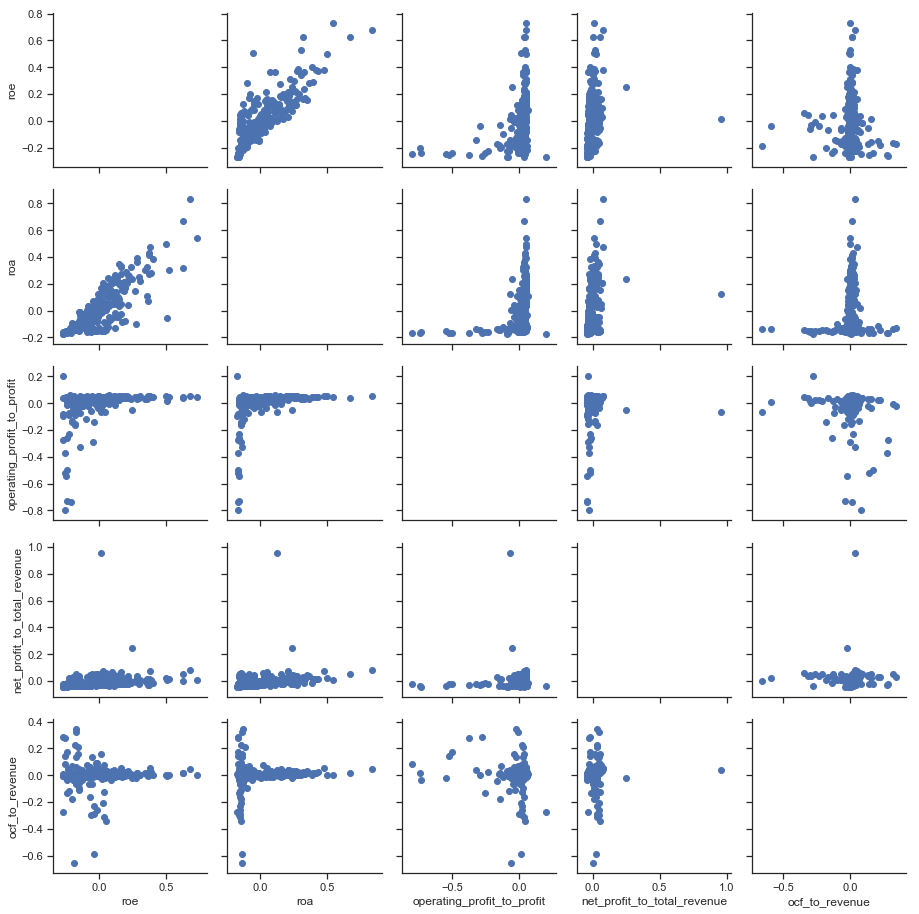

In [322]:
g = sns.PairGrid(normalized_df_finance)
#g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

The graphics show that it is possible to use linear regression to mimic **ROA** by **ROE**, and **ROA** (**ROE**) is linear independent on the other financial ratios.
For this project there is only 5 financial ratios have been used. When more financial ratios will be used in the future, plottig pairwise data relationship will help use to quickly find out financial ratios that are linear independent relationship with each other.

3.4 Combining Market Trade Data and Financial Ratio Data

In [323]:
df_market.head()

,MTD_CL,mean,std
000001.XSHE,3,0.000499,0.020919
000002.XSHE,9,0.000798,0.023231
000063.XSHE,0,0.000668,0.027802
000069.XSHE,9,0.000344,0.023451
000100.XSHE,9,0.000621,0.023595


In [324]:
df_finance.head()

,FRD_CL,roe,roa,operating_profit_to_profit,net_profit_to_total_revenue,ocf_to_revenue
code,,,,,,
000001.XSHE,0,10.7415,0.7445,67.6398,21.2636,-49.1132
000002.XSHE,6,23.4175,3.6580,89.8714,16.5521,11.2934
000069.XSHE,6,19.0496,4.4150,81.4199,23.4603,-20.7390
000100.XSHE,0,11.5144,2.3029,-5.1017,3.5833,9.2507
000157.XSHE,0,5.3309,2.2158,56.4621,6.8184,17.6471


In [325]:
total = df_finance.copy()
total = total.join(df_market)
total.head()

,FRD_CL,roe,roa,operating_profit_to_profit,net_profit_to_total_revenue,ocf_to_revenue,MTD_CL,mean,std
code,,,,,,,,,
000001.XSHE,0,10.7415,0.7445,67.6398,21.2636,-49.1132,3,0.000499,0.020919
000002.XSHE,6,23.4175,3.6580,89.8714,16.5521,11.2934,9,0.000798,0.023231
000069.XSHE,6,19.0496,4.4150,81.4199,23.4603,-20.7390,9,0.000344,0.023451
000100.XSHE,0,11.5144,2.3029,-5.1017,3.5833,9.2507,9,0.000621,0.023595
000157.XSHE,0,5.3309,2.2158,56.4621,6.8184,17.6471,3,0.000283,0.022518


At this moment, we got a dataframe containing all market data and financial ratio.

Further, we will find out the constituents in the same financial ratio cluster and the same market data cluster.

In [326]:
# There are 10 clusters for market data and 10 clusters for financial ratio data
# Totally, there may be 100 combined clusters, but some of them may not contain any constituent.
# We pick the constituent with the maximum ROE as the representative of each cluster. We can change the rule of pick representative of each cluster.
Constituents_List = []
for i in range(0, kclusters):
    for j in range(0, kclusters):
        df = total[(total['FRD_CL']==i) & (total['MTD_CL']==j)]
        constituent = df[df['roe']==df['roe'].max()].index
        if len(constituent.values) > 0:
            Constituents_List.append(constituent.values[0])
Constituents_List

['600332.XSHG',
 '600570.XSHG',
 '600104.XSHG',
 '603019.XSHG',
 '601229.XSHG',
 '002555.XSHE',
 '300142.XSHE',
 '601555.XSHG',
 '000625.XSHE',
 '601788.XSHG',
 '601577.XSHG',
 '601997.XSHG',
 '601336.XSHG',
 '601319.XSHG',
 '601601.XSHG',
 '601162.XSHG',
 '601198.XSHG',
 '601688.XSHG',
 '300059.XSHE',
 '601009.XSHG',
 '000776.XSHE',
 '601988.XSHG',
 '600030.XSHG',
 '601628.XSHG',
 '600733.XSHG',
 '000629.XSHE',
 '002607.XSHE',
 '000895.XSHE',
 '300413.XSHE',
 '600900.XSHG',
 '600516.XSHG',
 '600309.XSHG',
 '600674.XSHG',
 '600705.XSHG',
 '600061.XSHG',
 '000783.XSHE']

# 4. Results

Finally, we got a list of representative constituents picked by ROE

In [327]:
result = total.loc[Constituents_List]

The number of constituents

In [328]:
len(Constituents_List)

36

Now, we plot their distribution by mean and standard deviation.

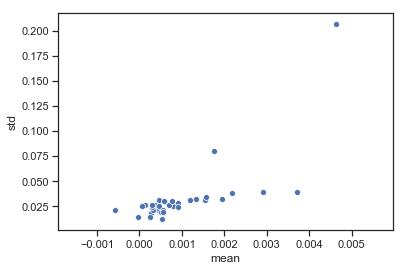

In [329]:
ax = sns.scatterplot(x='mean', y='std', data=result)

Let us look back to the source data

In [330]:
df_market.head()

,MTD_CL,mean,std
000001.XSHE,3,0.000499,0.020919
000002.XSHE,9,0.000798,0.023231
000063.XSHE,0,0.000668,0.027802
000069.XSHE,9,0.000344,0.023451
000100.XSHE,9,0.000621,0.023595


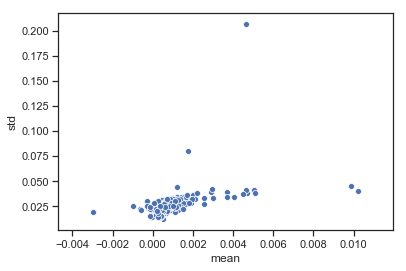

In [331]:
ax = sns.scatterplot(x='mean', y='std', data=df_market)

# 5. Conclusion

The cost of fully tracking an index is very high. In this project, we use K-mean algorithm for clustering constituents in CSI 300 Index by their market data and financial ratios in order to find out the representative in each cluster. The number of constituents for tracking CSI 300 Index has been reduced from 300 (fully) to 36.

# 6. Future Direction

Beyond this project we may add more financial ratios and pick up representatives by speficied financial raio (ROE is used in this project). We may use these representatives to build a new index tracking CSI 300 Index. But our index is not just tracking the CSI 300 Index, but also reflects the bias of the representative picker (fund manager). For a conservative fund manager, he may choose the **debt ratio** as a reference to pick the representative. A fund manager focusing on corporate's cash flow from operation will use the **ocf_to_revenue** as a reference. For building a tracking index, constituents' weights should be defined. In this project constituents' weights are not considered. But I will enhance this project in the future.